# Random Forest (Titanic - Dataset)

## 1. Loading Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Loading and Checking Data

In [2]:
# Load Data

train_data = pd.read_csv("../Dataset/train.csv")
test_data = pd.read_csv("../Dataset/test.csv")

## 3. Exploratory Data Analysis (EDA)

In [3]:
# Checking for missing values

print(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


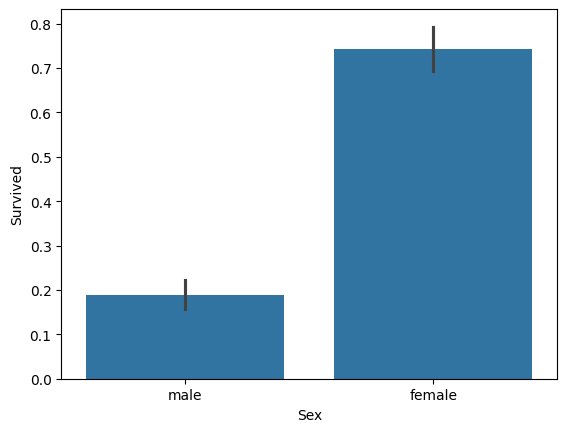

In [4]:
# Visualizing survival rate ny gender

sns.barplot(x='Sex', y='Survived', data=train_data)
plt.show()

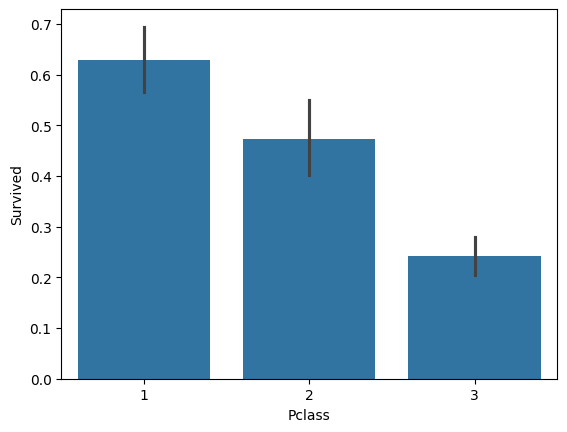

In [5]:
# Visualizing survival rate by passenger class

sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.show()

## 4. Data Preprocessing

In [6]:
# Initialize imputers for missing values

imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

In [7]:
# Apply imputers to fill missing values for 'Age' and 'Fare'

train_data[["Age", "Fare"]] = imputer_num.fit_transform(train_data[["Age", "Fare"]])
test_data[["Age", "Fare"]] = imputer_num.transform(test_data[["Age", "Fare"]])

In [8]:
# Fix for imputing 'Embarked' column (flatten array before assignment)

train_data["Embarked"] = imputer_cat.fit_transform(train_data[["Embarked"]]).ravel()
test_data["Embarked"] = imputer_cat.transform(test_data[["Embarked"]]).ravel()

In [9]:
# Drop 'Cabin' column due to too many missing values

train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

In [10]:
# Convert categorical features to numerical (Sex, Embarked)

train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [11]:
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

## 5. Feature Selection

In [12]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = train_data[features]
y = train_data['Survived']

## 6. Train-test split

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. Feature scaling

In [14]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

test_data_scaled = scaler.transform(test_data[features])

## 8. Random Forest

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

## 9. Model Evaluation

In [16]:
# Predictions on the validation set

y_pred = model.predict(X_val)

In [17]:
# Accuracy

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


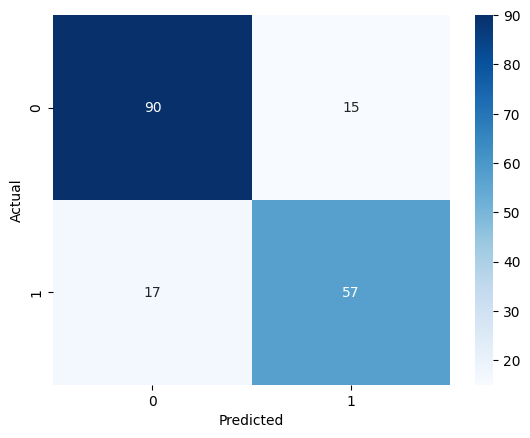

In [18]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
# Classification Report

print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## 10. Predictions on Test Data

In [20]:
test_predictions = model.predict(test_data_scaled)

## 11. Creating Submissions file for Kaggle

In [21]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

In [22]:
submission.to_csv('../Submission/Random_Forest_Submission.csv', index=False)

print("Submission file successfully created!")

Submission file successfully created!
